In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [3]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM + 1) * BRANCH_NUM / 2)

In [4]:
training_data.shape

(500, 100, 1000, 1)

In [5]:
training_labels.shape

(500, 5050)

In [6]:
# zero_padding_array.shape

In [7]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)


(500, 100, 1000, 1)
(500, 5050)
X_train.shape :  (425, 100, 1000, 1)
X_test.shape :  (75, 100, 1000, 1)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [8]:
# model = Sequential()

# # Layer 1
# model.add(Conv2D(64, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1), padding='same'))
# #model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 2
# model.add(Conv2D(32, (3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 3
# model.add(Conv2D(16, (3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(1, 2)))

# # Layer 4
# model.add(Conv2D(1, (2, 1), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(1, 2)))


In [9]:
model = Sequential()

# Layer 1
model.add(Conv2D(10, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(1, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(Flatten())
model.add(Dense(OUTPUT_DIST_NUM, activation='relu'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 998, 10)       100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 998, 10)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 98, 998, 10)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 499, 10)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 497, 5)        455       
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 497, 5)        20        
_________________________________________________________________
activation_2 (Activation)    (None, 47, 497, 5)       

In [11]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [12]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=600, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/600
425/425 [==============================] - 12s 29ms/step - loss: 0.2551 - accuracy: 0.0000e+00 - val_loss: 0.2586 - val_accuracy: 0.0000e+00
Epoch 2/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2306 - accuracy: 0.0000e+00 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 3/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2236 - accuracy: 0.0000e+00 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 4/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2187 - accuracy: 0.0000e+00 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 5/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2157 - accuracy: 0.0000e+00 - val_loss: 0.2221 - val_accuracy: 0.0000e+00
Epoch 6/600
425/425 [==============================] - 12s 27ms/step - loss: 0.2139 - accuracy: 0.0000e+00 - val_loss: 0.2184 - val_accuracy: 0.0000e+00
Epoch 7/600
425/425 [================

425/425 [==============================] - 12s 27ms/step - loss: 0.1402 - accuracy: 0.0235 - val_loss: 0.2693 - val_accuracy: 0.0000e+00
Epoch 56/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1407 - accuracy: 0.0282 - val_loss: 0.2612 - val_accuracy: 0.0000e+00
Epoch 57/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1409 - accuracy: 0.0259 - val_loss: 0.2507 - val_accuracy: 0.0000e+00
Epoch 58/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1398 - accuracy: 0.0259 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 59/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1389 - accuracy: 0.0188 - val_loss: 0.2422 - val_accuracy: 0.0000e+00
Epoch 60/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1376 - accuracy: 0.0235 - val_loss: 0.2686 - val_accuracy: 0.0000e+00
Epoch 61/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1362 - accuracy: 0.0235 - val_los

425/425 [==============================] - 12s 27ms/step - loss: 0.1159 - accuracy: 0.0282 - val_loss: 0.2711 - val_accuracy: 0.0000e+00
Epoch 110/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1171 - accuracy: 0.0165 - val_loss: 0.2501 - val_accuracy: 0.0000e+00
Epoch 111/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1155 - accuracy: 0.0329 - val_loss: 0.2563 - val_accuracy: 0.0000e+00
Epoch 112/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1158 - accuracy: 0.0306 - val_loss: 0.2622 - val_accuracy: 0.0000e+00
Epoch 113/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1156 - accuracy: 0.0282 - val_loss: 0.2525 - val_accuracy: 0.0000e+00
Epoch 114/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1150 - accuracy: 0.0235 - val_loss: 0.2586 - val_accuracy: 0.0000e+00
Epoch 115/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1146 - accuracy: 0.0259 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.1049 - accuracy: 0.0376 - val_loss: 0.2605 - val_accuracy: 0.0000e+00
Epoch 164/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1039 - accuracy: 0.0329 - val_loss: 0.2669 - val_accuracy: 0.0000e+00
Epoch 165/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1033 - accuracy: 0.0424 - val_loss: 0.2821 - val_accuracy: 0.0000e+00
Epoch 166/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1053 - accuracy: 0.0353 - val_loss: 0.2728 - val_accuracy: 0.0000e+00
Epoch 167/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1029 - accuracy: 0.0494 - val_loss: 0.2793 - val_accuracy: 0.0000e+00
Epoch 168/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1047 - accuracy: 0.0424 - val_loss: 0.2692 - val_accuracy: 0.0000e+00
Epoch 169/600
425/425 [==============================] - 12s 27ms/step - loss: 0.1039 - accuracy: 0.0424 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0976 - accuracy: 0.0541 - val_loss: 0.3181 - val_accuracy: 0.0000e+00
Epoch 218/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0990 - accuracy: 0.0424 - val_loss: 0.3161 - val_accuracy: 0.0000e+00
Epoch 219/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0981 - accuracy: 0.0541 - val_loss: 0.3119 - val_accuracy: 0.0000e+00
Epoch 220/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0983 - accuracy: 0.0612 - val_loss: 0.3090 - val_accuracy: 0.0000e+00
Epoch 221/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0975 - accuracy: 0.0494 - val_loss: 0.2996 - val_accuracy: 0.0000e+00
Epoch 222/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0963 - accuracy: 0.0376 - val_loss: 0.2927 - val_accuracy: 0.0000e+00
Epoch 223/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0967 - accuracy: 0.0329 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0925 - accuracy: 0.0565 - val_loss: 1.1560 - val_accuracy: 0.0000e+00
Epoch 272/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0927 - accuracy: 0.0471 - val_loss: 0.9131 - val_accuracy: 0.0000e+00
Epoch 273/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0931 - accuracy: 0.0447 - val_loss: 0.6422 - val_accuracy: 0.0000e+00
Epoch 274/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0936 - accuracy: 0.0424 - val_loss: 0.5569 - val_accuracy: 0.0000e+00
Epoch 275/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0942 - accuracy: 0.0518 - val_loss: 0.3582 - val_accuracy: 0.0000e+00
Epoch 276/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0923 - accuracy: 0.0447 - val_loss: 0.3037 - val_accuracy: 0.0000e+00
Epoch 277/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0915 - accuracy: 0.0518 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0876 - accuracy: 0.0471 - val_loss: 0.3013 - val_accuracy: 0.0000e+00
Epoch 326/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0882 - accuracy: 0.0494 - val_loss: 0.3076 - val_accuracy: 0.0000e+00
Epoch 327/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0869 - accuracy: 0.0471 - val_loss: 0.3169 - val_accuracy: 0.0000e+00
Epoch 328/600
425/425 [==============================] - 11s 27ms/step - loss: 0.0870 - accuracy: 0.0494 - val_loss: 0.2936 - val_accuracy: 0.0000e+00
Epoch 329/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0880 - accuracy: 0.0471 - val_loss: 0.2961 - val_accuracy: 0.0000e+00
Epoch 330/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0867 - accuracy: 0.0518 - val_loss: 0.3344 - val_accuracy: 0.0000e+00
Epoch 331/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0880 - accuracy: 0.0471 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0857 - accuracy: 0.0565 - val_loss: 0.3934 - val_accuracy: 0.0000e+00
Epoch 380/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0857 - accuracy: 0.0494 - val_loss: 0.3553 - val_accuracy: 0.0000e+00
Epoch 381/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0849 - accuracy: 0.0518 - val_loss: 0.3508 - val_accuracy: 0.0000e+00
Epoch 382/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0845 - accuracy: 0.0588 - val_loss: 0.3460 - val_accuracy: 0.0000e+00
Epoch 383/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0859 - accuracy: 0.0588 - val_loss: 0.4155 - val_accuracy: 0.0000e+00
Epoch 384/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0888 - accuracy: 0.0471 - val_loss: 0.4301 - val_accuracy: 0.0000e+00
Epoch 385/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0872 - accuracy: 0.0565 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0835 - accuracy: 0.0518 - val_loss: 0.4245 - val_accuracy: 0.0000e+00
Epoch 434/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0870 - accuracy: 0.0447 - val_loss: 0.4450 - val_accuracy: 0.0000e+00
Epoch 435/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0852 - accuracy: 0.0400 - val_loss: 0.4610 - val_accuracy: 0.0000e+00
Epoch 436/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0835 - accuracy: 0.0494 - val_loss: 0.4449 - val_accuracy: 0.0000e+00
Epoch 437/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0871 - accuracy: 0.0518 - val_loss: 0.4018 - val_accuracy: 0.0000e+00
Epoch 438/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0857 - accuracy: 0.0447 - val_loss: 0.4017 - val_accuracy: 0.0000e+00
Epoch 439/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0839 - accuracy: 0.0447 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0786 - accuracy: 0.0588 - val_loss: 0.3767 - val_accuracy: 0.0000e+00
Epoch 488/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0814 - accuracy: 0.0541 - val_loss: 0.3573 - val_accuracy: 0.0000e+00
Epoch 489/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0813 - accuracy: 0.0612 - val_loss: 0.3312 - val_accuracy: 0.0000e+00
Epoch 490/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0785 - accuracy: 0.0659 - val_loss: 0.3428 - val_accuracy: 0.0000e+00
Epoch 491/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0773 - accuracy: 0.0541 - val_loss: 0.3567 - val_accuracy: 0.0000e+00
Epoch 492/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0781 - accuracy: 0.0541 - val_loss: 0.3676 - val_accuracy: 0.0000e+00
Epoch 493/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0785 - accuracy: 0.0494 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0763 - accuracy: 0.0588 - val_loss: 0.3531 - val_accuracy: 0.0000e+00
Epoch 542/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0753 - accuracy: 0.0612 - val_loss: 0.3617 - val_accuracy: 0.0000e+00
Epoch 543/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0754 - accuracy: 0.0494 - val_loss: 0.3202 - val_accuracy: 0.0000e+00
Epoch 544/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0764 - accuracy: 0.0588 - val_loss: 0.2851 - val_accuracy: 0.0000e+00
Epoch 545/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0761 - accuracy: 0.0518 - val_loss: 0.2941 - val_accuracy: 0.0000e+00
Epoch 546/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0754 - accuracy: 0.0518 - val_loss: 0.4088 - val_accuracy: 0.0000e+00
Epoch 547/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0748 - accuracy: 0.0612 - v

425/425 [==============================] - 12s 27ms/step - loss: 0.0753 - accuracy: 0.0612 - val_loss: 0.4127 - val_accuracy: 0.0000e+00
Epoch 596/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0744 - accuracy: 0.0541 - val_loss: 0.3782 - val_accuracy: 0.0000e+00
Epoch 597/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0727 - accuracy: 0.0447 - val_loss: 0.3694 - val_accuracy: 0.0000e+00
Epoch 598/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0752 - accuracy: 0.0588 - val_loss: 0.3726 - val_accuracy: 0.0000e+00
Epoch 599/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0740 - accuracy: 0.0471 - val_loss: 0.3957 - val_accuracy: 0.0000e+00
Epoch 600/600
425/425 [==============================] - 12s 27ms/step - loss: 0.0742 - accuracy: 0.0400 - val_loss: 0.3550 - val_accuracy: 0.0000e+00


In [13]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 1s 8ms/step
Train Acc:  [0.07891547799110413, 0.04235294088721275]
Test Acc:  [0.3549791620175044, 0.0]


## X_train plot

In [15]:
X_train_results = model.predict(X_train)

In [31]:
train_show_index = 6

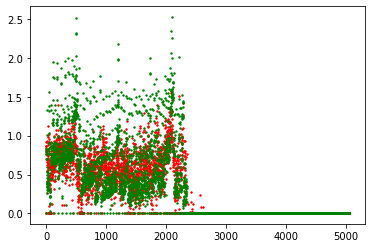

In [32]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)

## X_test plot

In [18]:
X_test_results = model.predict(X_test)

In [47]:
test_show_index = 7

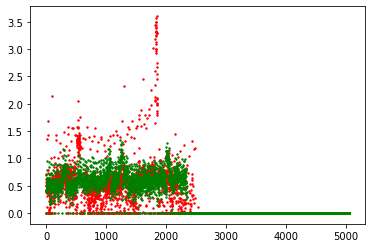

In [48]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)

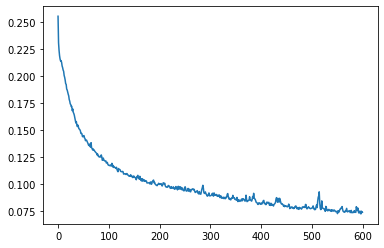

In [20]:
plt.plot(history.history['loss'])
plt.show()